Arvi Punzalan
Investigate a Data Set Project


The builders of the Titanic were confident in its indestructibility. So much so that they only included enough lifeboats to accomodate 1,178 of the 2,228 people on board. Unfortunately, the builders were wrong about the ship.

Many people lost their lives when the ship went down. Let's investigate which factors led a passenger to a higher chance of survival.

To begin with, let's see what data we have to work with.

In [28]:
#parse csv and investigate csv data

import pandas as pd

filename = '/Users/Arvi/Desktop/Data_Analyst/Investigate_A_Data_Set/Project/titanic-data.csv'

titanic_df = pd.read_csv(filename)
print(titanic_df.head())
print(titanic_df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

While it is known that most people did not survive the tragedy, it is still shocking to see a survival rate of only 38% on a luxury liner. I was also surprised to see the max fare paid of 500 dollars which is almost 13,000 dollars in todays money according to http://www.in2013dollars.com/

There is a lot of interesting data here, but it also has some shortcomings. The Passenger ID data is arbitrary, so I won't take it into account in my analysis. Sibling/spouse and parent/child don't specify which of the two options they refer to, so are limited in their usefulness as data. There were 1,317 passengers on the ship, but we have data for only 891 passengers. It is not specified how they were chosen from the total. Without knowing about the randomness passengers were selected for the data set, this analysis may not be unbiased.

Within the first five passengers, three are missing cabin data. Let's check to see how many passengers have cabin information.

In [29]:
#Check number of passengers with cabin data

cabin_noNaN = titanic_df['Cabin'].dropna()
print('Number of passengers with cabin data:')
print(len(cabin_noNaN))

Number of passengers with cabin data:
204


Out of 891 passengers, only 204 have cabin data. Because they are just a fraction of the total passengers, I won't use this data for my analysis.

In [30]:
#ticket class fares paid

class_groups = titanic_df.groupby('Pclass')
print(class_groups.mean())['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


Above I group the passengers by class then show the average price paid for a ticket to show the correlation between wealth and ticket class.

In [31]:
#averages for survivors vs. non-survivors

survivor_groupings = titanic_df.groupby('Survived', as_index=False)

#total number of survivors and non-survivors
print('Number of survivors vs non-survivors.')
print(survivor_groupings.apply(len))
print('\n')
print(survivor_groupings.mean())

Number of survivors vs non-survivors.
0    549
1    342
dtype: int64


   Survived  PassengerId    Pclass        Age     SibSp     Parch       Fare
0         0   447.016393  2.531876  30.626179  0.553734  0.329690  22.117887
1         1   444.368421  1.950292  28.343690  0.473684  0.464912  48.395408


Taking the means of the numerical data gave some interesting information. The data point that sticks out the most is discrepancy on fare paid between survivors and non-survivors. Survivors  on average paid more than double the fare of non-survivors. This leads me to believe that wealth was a good determiner of whether one survived or not.

Populating the interactive namespace from numpy and matplotlib

By far the highest paying passengers!
                                   Name   Age  Pclass      Fare
258                    Ward, Miss. Anna  35.0       1  512.3292
679  Cardeza, Mr. Thomas Drake Martinez  36.0       1  512.3292
737              Lesurer, Mr. Gustave J  35.0       1  512.3292


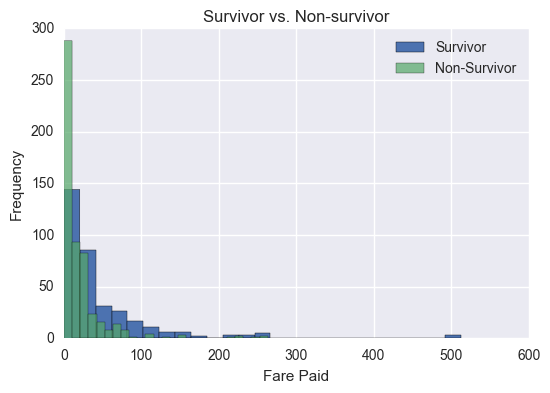

In [32]:
#plot histogram of ticket price paid for survivors vs non-survivors

import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline

print("\nBy far the highest paying passengers!")
print(titanic_df[titanic_df['Fare'] > 500][['Name', 'Age', 'Pclass', 'Fare']])

survival_fare_list = titanic_df[titanic_df['Survived'] == 1]['Fare']
non_survival_fare_list = titanic_df[titanic_df['Survived'] == 0]['Fare']
plt.hist(survival_fare_list, bins=25, label='Survivor')
plt.hist(non_survival_fare_list, bins=25, label='Non-Survivor', alpha=0.7)
plt.title('Survivor vs. Non-survivor')
plt.xlabel('Fare Paid')
plt.ylabel('Frequency')
plt.legend()

Despite fewer people surviving the crash, the graph above shows that the more one paid, the more likely he or she was to survive. The graph also shows that the $500 tickets were outliers. It is not surprising that all three of these passengers survived.

Lets take a look at the other data and their effect on survival beginning with gender. This will also give some insight on whether the adage "Women and children first!" was followed at the time.

In [33]:
#Were men or women more likely to survive?

gender_groups = titanic_df.groupby('Sex')
print(gender_groups.mean())


        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893  


The survival rate for women was much higher than for men. Women also had on average more siblings/spouse, parent/children, and fares paid. The discrepancy for siblings/spouse is likely because women didn't travel alone often during that time and similarly, the difference in parents/children is likely because children would likely only travel with their mother. It was shown above that there was a correlation with fare paid and survival. Could this be the reason for the big difference in survival rates between genders?

In [34]:
gender_survived_groups = titanic_df.groupby(['Sex', 'Survived'])['Fare']

print(gender_survived_groups.mean())

Sex     Survived
female  0           23.024385
        1           51.938573
male    0           21.960993
        1           40.821484
Name: Fare, dtype: float64


We see that the ratio for the fares paid depending on whether one survived or not was similar for males and females. Could it be that women survived much more often than men because in general they paid more?

In [35]:
gender_class_groups = titanic_df.groupby(['Sex', 'Pclass'])
print("Rate of survival by gender")
print(gender_groups.mean()['Survived'])
print('\nNumber of passengers by gender and class.')

print(gender_class_groups.apply(len))

Rate of survival by gender
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Number of passengers by gender and class.
Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64


Comparing the raw numbers of survivors vs non-survivors to the class breakdown of the genders, we see that women were nearly four times more likely to survive than men. Women were broken into classes at the following ratios: 1st-30%, 2nd-24%, 3rd-46% and men: 1st-21%, 2nd-19%, 3rd-60%. While women were generally in higher ticket classes, it was not so much as to account for the huge difference in survival rates between genders. Showing that there is a correlation between being a woman and having a higher chance of survival.

Let us now see if children were more likely to survive than adults by looking at the age data.

In [48]:
#group ages by bins
#website help: http://stackoverflow.com/questions/16947336/binning-a-dataframe-in-pandas-in-python

bins = np.linspace(0, 80, 9) 
#Returns num evenly spaced samples, calculated over the interval [start, stop].

#Remove NaN age data
titanic_noNan_ages = titanic_df[titanic_df['Age'].notnull()]
print('Number of passengers with age data.')
print(len(titanic_noNan_ages))
age_groups_noNaN = titanic_noNan_ages.groupby(np.digitize(titanic_noNan_ages['Age'], bins))

print("\nPassengers are broken down by age into 10 year bins: 0-9, 10-19,..., 70-79, 80+")
print(bins)

print("\nNumber of passengers in each bin.")
print(age_groups_noNaN.apply(len))
print("Above, we see a normal distribution of ages of the passengers.")

#graph of survival rates

#breakdown age groups onto ticket classes
age_class_groups_noNaN = titanic_noNan_ages.groupby([np.digitize(titanic_noNan_ages['Age'], bins), 'Pclass'])
survival_rates_by_age_group = age_class_groups_noNaN.mean()['Survived']

print('\nSurvival rates by age and ticket class.')
print(survival_rates_by_age_group)

Number of passengers with age data.
714

Passengers are broken down by age into 10 year bins: 0-9, 10-19,..., 70-79, 80+
[  0.  10.  20.  30.  40.  50.  60.  70.  80.]

Number of passengers in each bin.
1     62
2    102
3    220
4    167
5     89
6     48
7     19
8      6
9      1
dtype: int64
Above, we see a normal distribution of ages of the passengers.

Survival rates by age and ticket class.
   Pclass
1  1         0.666667
   2         1.000000
   3         0.452381
2  1         0.833333
   2         0.500000
   3         0.257576
3  1         0.705882
   2         0.415094
   3         0.233083
4  1         0.780000
   2         0.395833
   3         0.217391
5  1         0.594595
   2         0.555556
   3         0.058824
6  1         0.555556
   2         0.333333
   3         0.000000
7  1         0.307692
   2         0.333333
   3         0.333333
8  1         0.000000
   2         0.000000
   3         0.000000
9  1         1.000000
Name: Survived, dtype: float64


The data looks good except for there not being any data for second and third class passengers in the oldest age bin. We saw earlier that there was only one passenger in this age bin. Let's add NaN to this array to keep it the same size as the arrays of the other age bins. While the heat map used in the next cell would still produce the same graph without the fix, if I were to use the following arrays or dataframe in the future without adding the data, an error might occur.

I will fill the values with NaN as filling them with zero would be misleading in the plot below. I wanted to make sure that there was no confusion for the reader about the lack of data for second and third class passengers in the oldest age bin and using NaN produced a neutral color in the heatmap better showing that no passengers fit these categories. A disadvantage of using NaN is that other third party tools may misinterpret the NaN data. Above, I had to remove NaN from the age data because passengers were mistakenly placed into the 80+ age bin when they had NaN as their age. This would have given us an incorrect plot since those passengers could have belonged to any age group.


By far the oldest survivor in our set!
                                     Name   Age  Pclass  Fare
630  Barkworth, Mr. Algernon Henry Wilson  80.0       1  30.0


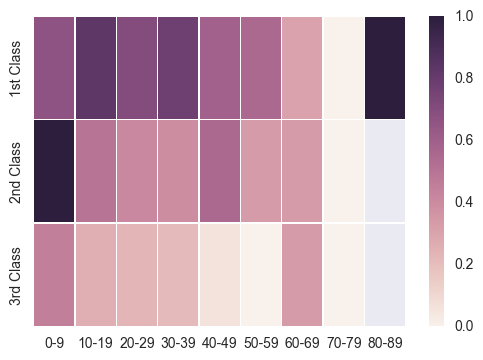

In [49]:
#put survival rate data into appropriate np arrays 
age0 = survival_rates_by_age_group.iloc[0:3].values
age10 = survival_rates_by_age_group.iloc[3:6].values
age20 = survival_rates_by_age_group.iloc[6:9].values
age30 = survival_rates_by_age_group.iloc[9:12].values
age40 = survival_rates_by_age_group.iloc[12:15].values
age50 = survival_rates_by_age_group.iloc[15:18].values
age60 = survival_rates_by_age_group.iloc[18:21].values
age70 = survival_rates_by_age_group.iloc[21:24].values
age80_value = survival_rates_by_age_group.iloc[24]

#add NaN to missing values
age80 = np.array([age80_value, NaN, NaN]) 

#combine np arrays into df
test_df = pd.DataFrame([age0, age10, age20, age30, age40, age50, age60, age70, age80], 
                       index = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'], 
                       columns = ['1st Class', '2nd Class', '3rd Class'])

print('\nBy far the oldest survivor in our set!')
print(titanic_df[(titanic_df['Age'] >= 80)][['Name', 'Age', 'Pclass', 'Fare']])

sns.heatmap(test_df.T, linewidths=0.3)

Out of the 891 passengers, we are supplied with 714 with age data. Unlike the cabin data, there is sufficient data to use.

From the data, it appears that the rules of chivalry applied not only to women, but to children as well. The passengers have been seperated into age bins and ticket class. Following each class down the age bins, we see that the older a passenger was, the less likely he/or she had survived. The only exception to this being the lone passenger over 80 years old who survived. Being the only person in that age bin, the data point in itself isn't enough to contradict the trend. Also, at each age bin we see that the lower the class, the less likely a passenger was to survive. While historically the axiom "Each man for himself" was followed, the data shows that on the Titanic, women and children were given priority on lifeboats.

Since there is a correlation with fare paid and survival, let's see if that could be a factor in the age survival correlation.

In [37]:
#Average ticket fare for each age bin
print(age_groups_noNaN.mean())['Fare']

1    30.576679
2    32.535132
3    27.278937
4    40.377294
5    38.002297
6    47.933333
7    48.367542
8    30.197233
9    30.000000
Name: Fare, dtype: float64


Looking at the average fare paid in each bin, it doesn't decrease in relationship to survival rate decreasing with the increase in age. This shows that there is a correlation between younger age and higher survival.

The final variable to check is embarked port.

In [38]:
#Which port was more likely to survive?

port_groups = titanic_df.groupby('Embarked')

print(port_groups['Survived'].mean())

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


Cherbourgian's survived at a significantly higher rate than average, while Queenstown and Southampton passengers were similar to the total average.

In [39]:
#Fare average by port

print(port_groups.mean()['Fare'])

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


Cherbourgian passengers paid much more than passengers from the other ports. This explains the discrepancy in survival rates between the port of embarkment.

Our analysis of the data shows that the factors that influence survival are gender, age, and wealth. Let's finish by summarizing this with a graph of survival rates for passengers broken down into three groups: children, men, and women as well as seperating them by wealth. We will show wealth breakdown by seperating them by ticket class.

In [40]:
#seperate into 3 groups, less than 18, men over 18, women over 18
#find survival rates for each class based on those groups
children_titanic = titanic_df[titanic_df['Age'] < 18].groupby('Pclass')
adult_titanic = titanic_df[titanic_df['Age'] >= 18]
male_titanic = adult_titanic[adult_titanic['Sex'] == 'male'].groupby('Pclass')
female_titanic = adult_titanic[adult_titanic['Sex'] != 'male'].groupby('Pclass')
print("Female survival rates")
print(female_titanic.mean()['Survived'])
print("\nMale survival rates")
print(male_titanic.mean()['Survived'])
print("\nChild survival rates")
print(children_titanic.mean()['Survived'])

Female survival rates
Pclass
1    0.974026
2    0.903226
3    0.417910
Name: Survived, dtype: float64

Male survival rates
Pclass
1    0.371134
2    0.068182
3    0.133333
Name: Survived, dtype: float64

Child survival rates
Pclass
1    0.916667
2    0.913043
3    0.371795
Name: Survived, dtype: float64


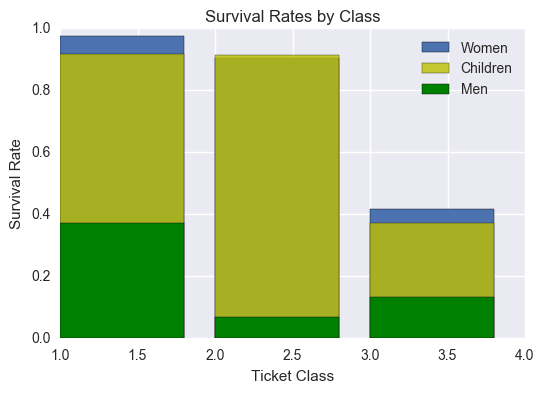

In [41]:
plt.bar([1,2,3],female_titanic.mean()['Survived'], label='Women')
plt.bar([1,2,3],children_titanic.mean()['Survived'], color = 'y', label='Children', alpha=0.8)
plt.bar([1,2,3],male_titanic.mean()['Survived'], color = 'g', label='Men')
plt.legend()
plt.title('Survival Rates by Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')

Female second class ticket holders survived at a slightly lower level than Children so you can't quite see it.

The graph and survival rate numbers confirm our findings showing that women and children survived much more than men and that the more money you paid, the more likely you lived through the tragedy.


The data set had some limitations. Data was not given for all passengers and it was not specified if these passengers were chosen randomly. Missing cabin data from most passengers decreased the reliability of that information and there were many underlying factors not given in the data set which could have caused the results we see. Because of this, we are only able to note correlations and not show causation.

Despite these limitations, I was able to come to some interesting conclusions. Out of the 891 passengers from our dataset, a mere 342 or 38% survived. Not all passengers had the same chances of making through the disaster alive however. Sadly, those who survived paid on average more than twice what those who parished paid. On the bright side, chilvalry was alive that day as children and women had a very good chance to survive. Women and children in first or second class had an over 90% survival rate! Fewer than one in five men survived and this terrible rate got even worse the older a man was. Despite this, one lucky (or resourceful) man, Mr. Algernon Henry Wilson Barkworth, survived.

Some people like Mr. Barkworth bucked the trends, however if you were on the titanic on the day it sank you would have liked to have been a woman or young child with a lot of money.

Extra Credit: I haven't seen the Titanic movie nor did I have much knowledge about the people who survived the disaster. I was expecting the survival rates for different ticket classes, but was pleasantly surprised about the children and women rates. I would be interested in looking into recent disasters to see if that is still common. 

For fun, I would like to analyze data on a game I play called Hearthstone. More seriously, I would like to analyze data on how people are changing their home choice habits such as van living, co-op homes, sustainable living, etc. After doing a lot of traveling, I believe that much of the US population and that of other developed countries spend more money on and have much bigger living spaces than is necessary. I would like to find trends on how this is can be improved.